<h1> Thesis Code
 <h1>

<h3> Import of all the libraries <h3>
    

In [1]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle
import os
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import time
from pylab import rcParams
import six
import sys
#sys.modules['sklearn.externals.six'] = six
import mlrose
from imblearn.under_sampling import NearMiss
import missingno as msno
from sklearn.metrics import classification_report, auc, precision_recall_curve, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from keras import backend as K


Using TensorFlow backend.
C:\Users\Tero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


<h3> Importing the files into dataframes from local system
    <h3>

<h4> Part 1 of importing
    <h4>

In [2]:
stock1 = sorted(glob('D:/Masters Data/RIC/Sepsis/training_setA/training/p0*.psv'))


In [3]:
#List of psv files in the folder training_setA/training

stock1

['D:/Masters Data/RIC/Sepsis/training_setA/training\\p000001.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000002.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000003.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000004.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000005.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000006.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000007.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000008.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000009.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000010.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000011.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000012.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000013.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000014.psv',
 'D:/Masters Data/RIC/Sepsis/training_setA/training\\p000015.p

In [4]:
#adding all the psv files in the folder to a single dataframe using the read_csv and delimiter seperator "|"

df_A = pd.concat((pd.read_csv(file,sep='|' ).assign(filename = file)
                for file in stock1), ignore_index = True)

In [5]:
#how the dataframe looks after loading of the data

df_A

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,7,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,8,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,9,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,10,0,D:/Masters Data/RIC/Sepsis/training_setA/train...


In [6]:
#790215 rows × 42 columns from Dataframe df_A


In [7]:
stock2 = sorted(glob('D:/Masters Data/RIC/Sepsis/training_setB/training_setB/p1*.psv'))


In [8]:
#List of psv files in the folder training_setB/training_setB


stock2


['D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100001.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100002.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100003.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100004.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100005.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100006.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100007.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100008.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100009.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100010.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100011.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100012.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p100013.psv',
 'D:/Masters Data/RIC/Sepsis/training_setB/training_setB\\p10001

In [9]:
#adding all the psv files in the folder to a single dataframe using the read_csv and delimiter seperator "|"

df_B = pd.concat((pd.read_csv(file,sep='|' ).assign(filename = file)
                for file in stock2), ignore_index = True)

In [10]:
#how the dataframe looks after loading of the data

df_B

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,1,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,2,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,3,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,4,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,5,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,6,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
6,91.5,97.0,36.5,104.0,75.0,60.0,20.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,7,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
7,94.0,95.0,NaN,114.0,85.0,66.0,20.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,8,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
8,94.0,95.0,NaN,121.0,88.0,69.0,20.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,9,0,D:/Masters Data/RIC/Sepsis/training_setB/train...
9,102.0,95.0,NaN,117.0,89.0,70.0,20.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,10,0,D:/Masters Data/RIC/Sepsis/training_setB/train...


In [11]:
#761995 rows × 42 columns


In [12]:
#merging both the dataframe

df_F = pd.concat([df_A, df_B])

In [13]:
#merged dataframe

df_F

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,7,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,8,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,9,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,10,0,D:/Masters Data/RIC/Sepsis/training_setA/train...


In [14]:
#1552210 rows × 42 columns


In [15]:
df_f = pd.concat([df_A, df_B])

<h3> Data Exploration
    <h3>

<h4> Total Number of Patients
<h4>

In [16]:
len(df_F['filename'].unique())

40336

<h4> Total Number of patients with Sepsis
    <h4>
        

In [17]:
SepsisPateints = np.array(df_F.groupby(['filename']) \
                          ['SepsisLabel'].sum())

len(SepsisPateints[SepsisPateints > 0])

2932

<h4> Number of hours a patient spends in Hospital
    <h4>

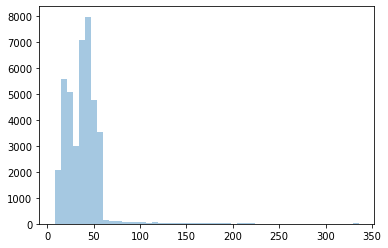

In [18]:

Hourinhospital = np.array(df_F.groupby(['filename'])['SepsisLabel']\
                            .count())

sns.distplot(Hourinhospital, kde=False);

In [19]:
count = np.bincount(Hourinhospital)
np.argmax(count)

36

<h4> Hour at which a patient contracts Sepsis
    <h4>

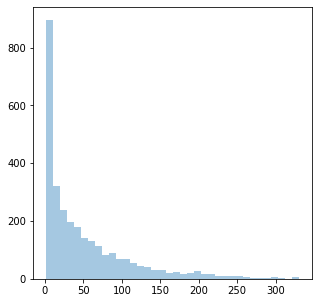

In [20]:
temp = df_F.groupby(['filename'])['SepsisLabel']\
       .sum().reset_index()

sepsis_train_pid = np.array(temp[temp['SepsisLabel'] > 0]['filename'])


temp_filter = df_F[df_F['filename']\
                                   .isin(sepsis_train_pid)]

sepsis_time = []
tot_time = []



for pid in sepsis_train_pid:
    
    df = temp_filter[temp_filter['filename']==pid]
    sepsis_time.append(df[df['SepsisLabel']==1]['ICULOS'].iloc[0])
    tot_time.append(df[df['SepsisLabel']==1]['ICULOS'][::-1].iloc[0])

rcParams['figure.figsize'] = 5, 5

  
sns.distplot(sepsis_time, kde=False);

<h4> Missing data
    <h4>
        

In [21]:

df_F.isna().sum()

HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           1460001
Age                       0
Gender              

In [22]:
#percentage of missing data


Text(0.5, 1.0, 'Percentage of missing data in each feature')

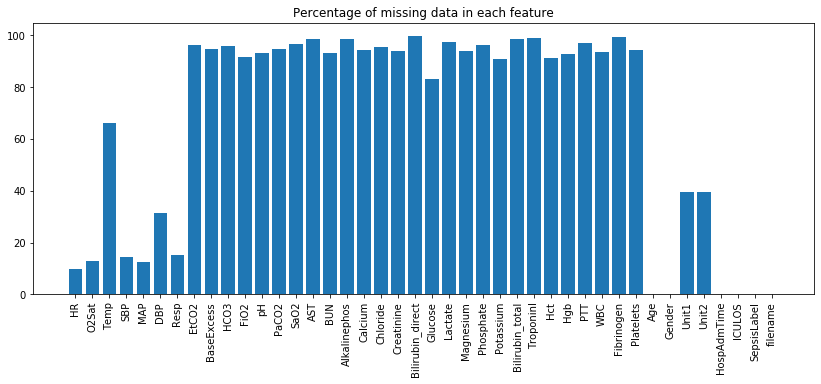

In [23]:
missing = (df_f.isnull().sum() / df_f.shape[0]) * 100




rcParams['figure.figsize'] = 14, 5
_ = plt.bar(missing.index, missing)
_ = plt.xticks(missing.index, rotation=90)

plt.title("Percentage of missing data in each feature")

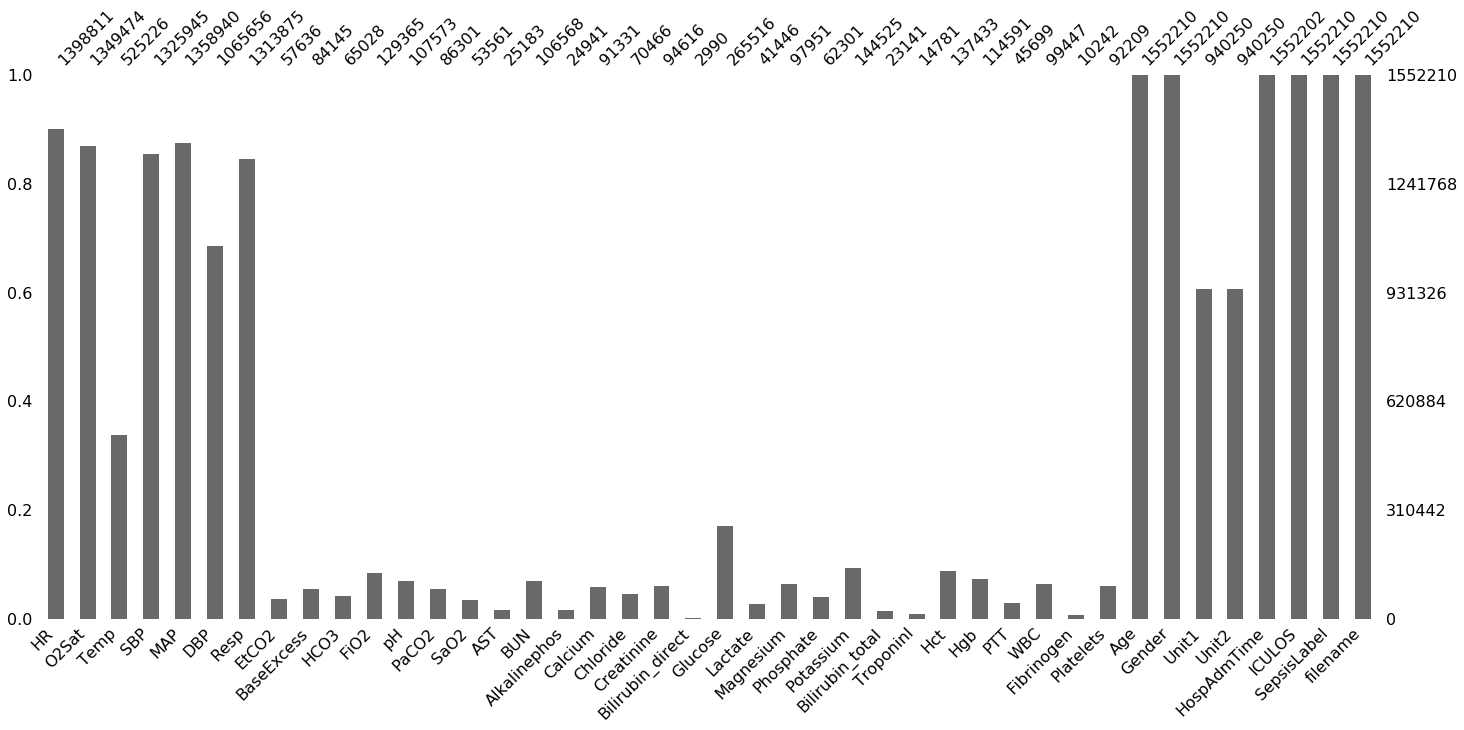

In [24]:
#bar graph of data avaialble
msno.bar(df_F)

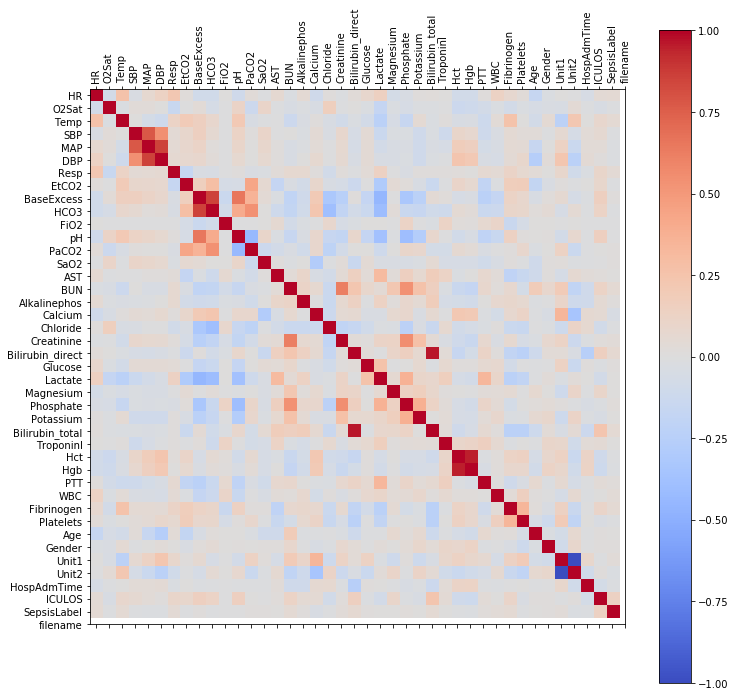

In [25]:
#All varaibles correlation matrix

corr = df_F.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df_F.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_F.columns)
ax.set_yticklabels(df_F.columns)

#plt.savefig('Saved_Figures/correlation.png')
plt.show()

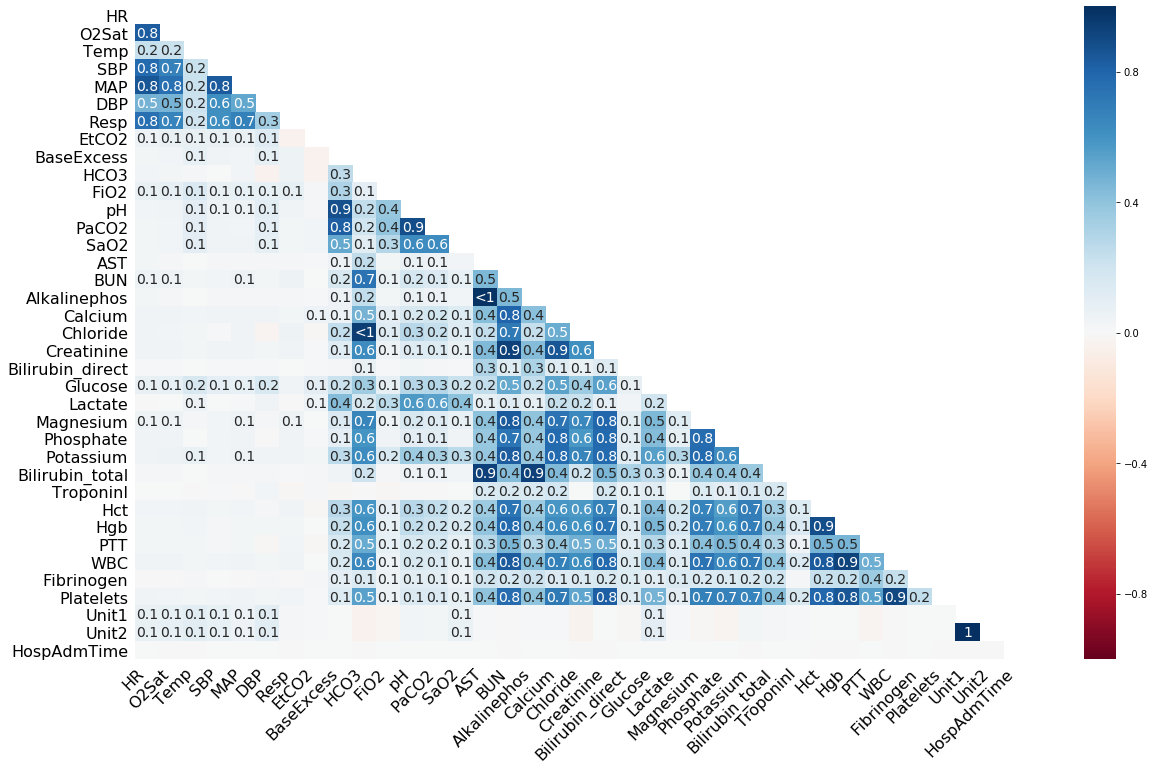

In [26]:
#heatmap of the variables

msno.heatmap(df_F)


In [27]:
#count of sepsis label

df1 = df_F['SepsisLabel'].value_counts()
df1

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

In [28]:
#this shows that the data set is imbalanced as the sepsis cases is only 27916

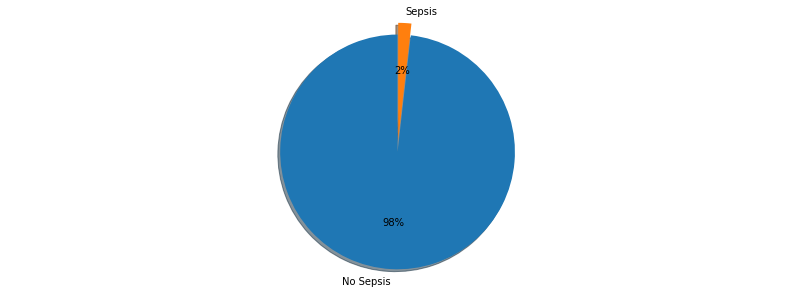

In [29]:
#bar chart of sepsis percentage

no_sepsis_percent = (df1[0]/(df1[0]+df1[1]))*100
sepsis_percent = (df1[1]/(df1[0]+df1[1]))*100
#fig = plt.figure(figsize=(5,5))
labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')



#plt.savefig('Saved_Figures/percent_sepsis.png')
plt.show()


<h3> Data Preprocessing
    <h3>

<h4> Handling missing data
    <h4>

In [30]:
#dropping data which has missing value more than 40%

In [31]:
df_F.drop(['Temp','EtCO2','BaseExcess','HCO3','FiO2',
           'pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium',
           'Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
           'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI',
           'Hct','Hgb','PTT','WBC','Fibrinogen','Platelets','Unit1','Unit2'], axis=1, inplace=True)

In [32]:
df_F

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,-0.03,1,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
1,97.0,95.0,98.0,75.33,NaN,19.0,83.14,0,-0.03,2,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
2,89.0,99.0,122.0,86.00,NaN,22.0,83.14,0,-0.03,3,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
3,90.0,95.0,NaN,NaN,NaN,30.0,83.14,0,-0.03,4,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
4,103.0,88.5,122.0,91.33,NaN,24.5,83.14,0,-0.03,5,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
5,110.0,91.0,NaN,NaN,NaN,22.0,83.14,0,-0.03,6,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
6,108.0,92.0,123.0,77.00,NaN,29.0,83.14,0,-0.03,7,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
7,106.0,90.5,93.0,76.33,NaN,29.0,83.14,0,-0.03,8,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
8,104.0,95.0,133.0,88.33,NaN,26.0,83.14,0,-0.03,9,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
9,102.0,91.0,134.0,87.33,NaN,30.0,83.14,0,-0.03,10,0,D:/Masters Data/RIC/Sepsis/training_setA/train...


In [33]:
df_F.isna().sum()

HR             153399
O2Sat          202736
SBP            226265
MAP            193270
DBP            486554
Resp           238335
Age                 0
Gender              0
HospAdmTime         8
ICULOS              0
SepsisLabel         0
filename            0
dtype: int64

In [34]:
#HR, O2Satm SBP, MAP, DBP, Resp and HospAdmTime has data missing

In [35]:
#duplicating the data frame

df_F1 = df_F

In [36]:
df_F1

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,-0.03,1,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
1,97.0,95.0,98.0,75.33,NaN,19.0,83.14,0,-0.03,2,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
2,89.0,99.0,122.0,86.00,NaN,22.0,83.14,0,-0.03,3,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
3,90.0,95.0,NaN,NaN,NaN,30.0,83.14,0,-0.03,4,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
4,103.0,88.5,122.0,91.33,NaN,24.5,83.14,0,-0.03,5,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
5,110.0,91.0,NaN,NaN,NaN,22.0,83.14,0,-0.03,6,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
6,108.0,92.0,123.0,77.00,NaN,29.0,83.14,0,-0.03,7,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
7,106.0,90.5,93.0,76.33,NaN,29.0,83.14,0,-0.03,8,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
8,104.0,95.0,133.0,88.33,NaN,26.0,83.14,0,-0.03,9,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
9,102.0,91.0,134.0,87.33,NaN,30.0,83.14,0,-0.03,10,0,D:/Masters Data/RIC/Sepsis/training_setA/train...


In [37]:
#Using median to impute missing data

In [38]:
#HR

HR_median = df_F1['HR'].median()
HR_median

83.5

In [39]:
#inserting the medain instead of null values

df_F1['HR'].fillna(HR_median,inplace=True)


In [40]:
#O2Sat

O2Sat_median = df_F1['O2Sat'].median()
O2Sat_median

98.0

In [41]:
#inserting the medain instead of null values

df_F1['O2Sat'].fillna(O2Sat_median,inplace=True)

In [42]:
#SBP

SBP_median = df_F1['SBP'].median()
SBP_median

121.0

In [43]:
#inserting the medain instead of null values

df_F1['SBP'].fillna(SBP_median,inplace=True)

In [44]:
#MAP

MAP_median = df_F1['MAP'].median()
MAP_median

80.0

In [45]:
#inserting the medain instead of null values


df_F1['MAP'].fillna(MAP_median,inplace=True)

In [46]:
#DBP

DBP_median = df_F1['DBP'].median()
DBP_median

62.0

In [47]:
#inserting the medain instead of null values


df_F1['DBP'].fillna(DBP_median,inplace=True)

In [48]:
#Resp

Resp_median = df_F1['Resp'].median()
Resp_median

18.0

In [49]:
#inserting the medain instead of null values


df_F1['Resp'].fillna(Resp_median,inplace=True)

In [50]:
#HospAdmTime

HospAdmTime_median = df_F1['HospAdmTime'].median()
HospAdmTime_median

-6.03

In [51]:
#inserting the medain instead of null values


df_F1['HospAdmTime'].fillna(HospAdmTime_median,inplace=True)

In [52]:
#checking null values after the median imputation

df_F1.isna().sum()

HR             0
O2Sat          0
SBP            0
MAP            0
DBP            0
Resp           0
Age            0
Gender         0
HospAdmTime    0
ICULOS         0
SepsisLabel    0
filename       0
dtype: int64

In [53]:
# no missing data now

In [54]:
#duplicating the data frame

df_F2 = df_F1

df_F3 = df_F1
df_F5 = df_F1

In [55]:
#dropping filename

df_F2.drop(['filename'], axis=1, inplace=True)

In [56]:
df_F2

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,83.5,98.0,121.0,80.00,62.0,18.0,83.14,0,-0.03,1,0
1,97.0,95.0,98.0,75.33,62.0,19.0,83.14,0,-0.03,2,0
2,89.0,99.0,122.0,86.00,62.0,22.0,83.14,0,-0.03,3,0
3,90.0,95.0,121.0,80.00,62.0,30.0,83.14,0,-0.03,4,0
4,103.0,88.5,122.0,91.33,62.0,24.5,83.14,0,-0.03,5,0
5,110.0,91.0,121.0,80.00,62.0,22.0,83.14,0,-0.03,6,0
6,108.0,92.0,123.0,77.00,62.0,29.0,83.14,0,-0.03,7,0
7,106.0,90.5,93.0,76.33,62.0,29.0,83.14,0,-0.03,8,0
8,104.0,95.0,133.0,88.33,62.0,26.0,83.14,0,-0.03,9,0
9,102.0,91.0,134.0,87.33,62.0,30.0,83.14,0,-0.03,10,0


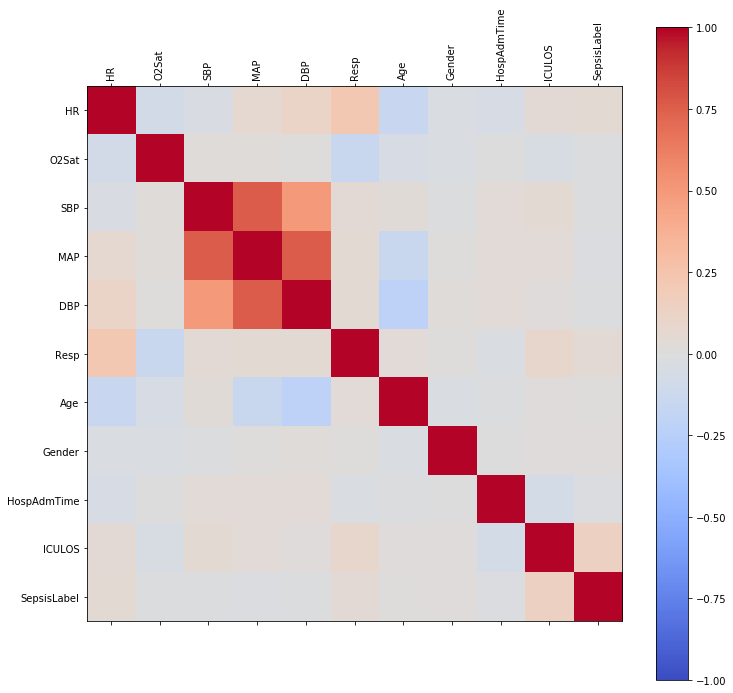

In [57]:
#correlation matrix of the remaining variables post data imputation

corr = df_F2.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df_F.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_F.columns)
ax.set_yticklabels(df_F.columns)

#plt.savefig('Saved_Figures/correlation.png')
plt.show()

In [58]:
#Variance of the variables

variance= np.var(df_F2)
print(variance)

HR               270.603912
O2Sat              7.572703
SBP              461.974241
MAP              234.429084
DBP              134.438768
Resp              22.069267
Age              268.507964
Gender             0.246487
HospAdmTime    26327.164126
ICULOS           841.313797
SepsisLabel        0.017661
dtype: float64


In [59]:
df_F2

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,83.5,98.0,121.0,80.00,62.0,18.0,83.14,0,-0.03,1,0
1,97.0,95.0,98.0,75.33,62.0,19.0,83.14,0,-0.03,2,0
2,89.0,99.0,122.0,86.00,62.0,22.0,83.14,0,-0.03,3,0
3,90.0,95.0,121.0,80.00,62.0,30.0,83.14,0,-0.03,4,0
4,103.0,88.5,122.0,91.33,62.0,24.5,83.14,0,-0.03,5,0
5,110.0,91.0,121.0,80.00,62.0,22.0,83.14,0,-0.03,6,0
6,108.0,92.0,123.0,77.00,62.0,29.0,83.14,0,-0.03,7,0
7,106.0,90.5,93.0,76.33,62.0,29.0,83.14,0,-0.03,8,0
8,104.0,95.0,133.0,88.33,62.0,26.0,83.14,0,-0.03,9,0
9,102.0,91.0,134.0,87.33,62.0,30.0,83.14,0,-0.03,10,0


In [60]:
#dulpicating the data frame

df_F10 = df_F2

<h4> Feature Engineering
    <h4>

<h5> Heart Rate
    <h5>
        

In [61]:

#Heart rate for a healthy adult is between 60 and 100. For a healthy infant it is between 70 and 190. Creating a new feature custom_hr , which is categorical variable having three values Normal=1, Abnormal=0 and Missing

def feature_engineer_hr(df_F10):
    df_F10.loc[(df_F10['HR'] >= 100) & (df_F10['Age'] >= 10 ),
            'custom_hr'] = 0
    df_F10.loc[(df_F10['HR'] < 100) & (df_F10['HR'] > 60) & (df_F10['Age'] >= 10 ),
            'custom_hr'] = 1
    df_F10.loc[(df_F10['HR'] >= 70) & (df_F10['HR'] < 190) & (df_F10['Age'] < 10 ),
            'custom_hr'] = 1
    df_F10.loc[((df_F10['HR'] < 70) | (df_F10['HR'] >= 190)) & (df_F10['Age'] < 10 ),
            'custom_hr'] = 0
    df_F10['custom_hr'].fillna(3, inplace=True)
    return df_F10










<h4> Age
    <h4>

In [62]:
#Categorizing patient based on age to old, infant and Child/adult

def featuer_engineer_age(df_F10):
    df_F10.loc[df_F10['Age'] >=65, 'custom_age'] = 2
    df_F10.loc[df_F10['Age'] <1, 'custom_age'] = 0
    df_F10.loc[(df_F10['Age'] >=1) & (df_F10['Age'] <65), 
            'custom_age'] = 1
    return df_F10


<h4> O2Stat
    <h4>

In [63]:

# O2Stat for a healthy adult is between 90 and 100 for healthy human beings. Create a new categorical variable custom_o2stat with levels normal, abnormal and missing

def feature_engineer_o2stat(df_F10):
    df_F10.loc[(df_F10['O2Sat'] >= 90) & (df_F10['O2Sat'] < 100), 
            'custom_o2stat'] = 1
    df_F10.loc[(df_F10['O2Sat'] < 90) & (df_F10['O2Sat'] >= 0), 
            'custom_o2stat'] = 0

    df_F10['custom_o2stat'].fillna(np.nan, inplace=True)
    return df_F3

<h4> SBP and DBP
    <h4>

In [64]:
#SBP stands for Systolic blood pressure, It is the upper number while measuring Blood pressure. DBP stands for Diastolic blood pressure , It is the lower number while measuring Blood pressure. Using both these columns to categorize blood pressure as low, normal, elevated , high and missing

def feature_engineer_blood_pressure(df_F10):
    df_F10.loc[(df_F10['SBP'] <90) & (df_F10['DBP'] <60), 'custom_bp'] = 0

    df_F10.loc[(df_F10['SBP'].between(90,120, inclusive=True)) & 
            (df_F10['DBP'].between(60,80, inclusive=True)), 
            'custom_bp'] = 1


    df_F10.loc[(df_F10['SBP'].between(120,140, inclusive=True)) & 
            (df_F10['DBP'].between(80,90, inclusive=True)), 
            'custom_bp'] = 2


    df_F10.loc[(df_F10['SBP'] > 140 ) & 
            (df_F10['DBP'] > 90 ), 'custom_bp'] = 3

    df_F10['custom_bp'].fillna(np.nan, inplace=True)
    return df_F10


<h4> Respiration Rate
    <h4>

In [65]:
#Respiration rate for healthy adults is between 12 and 20. Categorizing respiratory rate as normal and abnormal based on thresholds.

def feature_engineer_resp_rate(df_F10):
    df_F10.loc[(df_F10['Resp'].between(30,60)) & (df_F10['Age'] <1), 
            'custom_resp'] = 1
    df_F10.loc[((df_F10['Resp'] < 30) | (df_F10['Resp'] > 60)) & 
             (df_F10['Age'] <1) ,'custom_resp'] = 0


    df_F10.loc[(df_F10['Resp'].between(24,40)) & (df_F10['Age'].between(1,3)), 
            'custom_resp'] = 1
    df_F10.loc[((df_F10['Resp'] < 24) | (df_F10['Resp'] > 40)) & 
             (df_F10['Age'].between(1,3)) ,'custom_resp'] = 0


    df_F10.loc[(df_F10['Resp'].between(22,34)) & (df_F10['Age'].between(3,6)), 
            'custom_resp'] = 'normal'
    df_F10.loc[((df_F10['Resp'] < 22) | (df_F10['Resp'] > 34)) & 
             (df_F10['Age'].between(3,6)) ,'custom_resp'] = 'abnormal'


    df_F10.loc[(df_F10['Resp'].between(18,30)) & (df_F10['Age'].between(6,12)), 
            'custom_resp'] = 1
    df_F10.loc[((df_F10['Resp'] < 18) | (df_F10['Resp'] > 30)) & 
             (df_F10['Age'].between(6,12)) ,'custom_resp'] = 0


    df_F10.loc[(df_F10['Resp'].between(12,20)) & (df_F10['Age'] >12), 
            'custom_resp'] = 1
    df_F10.loc[((df_F10['Resp'] < 12) | (df_F10['Resp'] > 20)) & (df_F10['Age'] >12),
            'custom_resp'] = 0

    df_F10['custom_resp'].fillna(np.nan, inplace=True)


    return df_F10


<h4> MAP
    <h4>

In [66]:
# MAP for a healthy adult is between 70 and 100 for healthy human beings. Create a new categorical variable custom_map with levels low, normal and high

def feature_engineer_map(df_F10):
    df_F10.loc[(df_F10['MAP'] >= 69),
            'custom_map'] = 0
    df_F10.loc[(df_F10['MAP'] <= 70) & (df_F10['MAP'] >= 100), 
            'custom_map'] = 1
    df_F10.loc[(df_F10['MAP'] < 100),
            'custom_map'] = 2

    df_F10['custom_map'].fillna(np.nan, inplace=True)
    return df_F10

In [67]:
#adding the values to the data frame

df_F10 = feature_engineer_map(df_F10)
df_F10 = feature_engineer_blood_pressure(df_F10)
df_F10 = feature_engineer_hr(df_F10)
df_F10 = feature_engineer_o2stat(df_F10)
df_F10 = featuer_engineer_age(df_F10)
df_F10 = feature_engineer_resp_rate(df_F10)


In [68]:
df_F10

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,custom_map,custom_bp,custom_hr,custom_o2stat,custom_age,custom_resp
0,83.5,98.0,121.0,80.00,62.0,18.0,83.14,0,-0.03,1,0,2.0,NaN,1.0,1.0,2.0,1
1,97.0,95.0,98.0,75.33,62.0,19.0,83.14,0,-0.03,2,0,2.0,1.0,1.0,1.0,2.0,1
2,89.0,99.0,122.0,86.00,62.0,22.0,83.14,0,-0.03,3,0,2.0,NaN,1.0,1.0,2.0,0
3,90.0,95.0,121.0,80.00,62.0,30.0,83.14,0,-0.03,4,0,2.0,NaN,1.0,1.0,2.0,0
4,103.0,88.5,122.0,91.33,62.0,24.5,83.14,0,-0.03,5,0,2.0,NaN,0.0,0.0,2.0,0
5,110.0,91.0,121.0,80.00,62.0,22.0,83.14,0,-0.03,6,0,2.0,NaN,0.0,1.0,2.0,0
6,108.0,92.0,123.0,77.00,62.0,29.0,83.14,0,-0.03,7,0,2.0,NaN,0.0,1.0,2.0,0
7,106.0,90.5,93.0,76.33,62.0,29.0,83.14,0,-0.03,8,0,2.0,1.0,0.0,1.0,2.0,0
8,104.0,95.0,133.0,88.33,62.0,26.0,83.14,0,-0.03,9,0,2.0,NaN,0.0,1.0,2.0,0
9,102.0,91.0,134.0,87.33,62.0,30.0,83.14,0,-0.03,10,0,2.0,NaN,0.0,1.0,2.0,0


In [69]:
#dropping the old columns as new columns are created

df_F10.drop(['HR','O2Sat','SBP','MAP','DBP','Resp','Age'], axis=1, inplace=True)

In [70]:

df_F10

,Gender,HospAdmTime,ICULOS,SepsisLabel,custom_map,custom_bp,custom_hr,custom_o2stat,custom_age,custom_resp
0,0,-0.03,1,0,2.0,NaN,1.0,1.0,2.0,1
1,0,-0.03,2,0,2.0,1.0,1.0,1.0,2.0,1
2,0,-0.03,3,0,2.0,NaN,1.0,1.0,2.0,0
3,0,-0.03,4,0,2.0,NaN,1.0,1.0,2.0,0
4,0,-0.03,5,0,2.0,NaN,0.0,0.0,2.0,0
5,0,-0.03,6,0,2.0,NaN,0.0,1.0,2.0,0
6,0,-0.03,7,0,2.0,NaN,0.0,1.0,2.0,0
7,0,-0.03,8,0,2.0,1.0,0.0,1.0,2.0,0
8,0,-0.03,9,0,2.0,NaN,0.0,1.0,2.0,0
9,0,-0.03,10,0,2.0,NaN,0.0,1.0,2.0,0


In [71]:
#checking null values of the new column

df_F10.isnull().sum()

Gender                 0
HospAdmTime            0
ICULOS                 0
SepsisLabel            0
custom_map             0
custom_bp        1151790
custom_hr              0
custom_o2stat     326414
custom_age             0
custom_resp            0
dtype: int64

In [72]:
#custom_bp and custom_02stat has null values due to the feature engineering
#replacing null values with medians

custom_bp_median = df_F10['custom_bp'].median()
df_F10['custom_bp'].fillna(custom_bp_median,inplace=True)

custom_o2stat_median = df_F10['custom_o2stat'].median()
df_F10['custom_o2stat'].fillna(custom_o2stat_median,inplace=True)



In [73]:
df_F10.isnull().sum()

Gender           0
HospAdmTime      0
ICULOS           0
SepsisLabel      0
custom_map       0
custom_bp        0
custom_hr        0
custom_o2stat    0
custom_age       0
custom_resp      0
dtype: int64

In [74]:
#no null values

<h3> Splitting data into train and test
    <h3>

In [75]:
#data splitting of Feature engineered data

#Create independent and Dependent Features
columns = df_F10.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["SepsisLabel"]]
# Store the variable we are predicting 
target = "SepsisLabel"

In [76]:
# Define a random state 
state = np.random.RandomState(42)
X = df_F10[columns]
Y = df_F10[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [77]:
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1552210, 9)
(1552210,)


<h4> Making the imbalanced dataset balanced before splitting
    <h4>

In [78]:
#using undersampling technique

In [79]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)

C:\Users\Tero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [84]:

x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=10)

In [85]:
#printing the change in the shape after under sampling

print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1524294, 1: 27916})
Resampled dataset shape Counter({0: 27916, 1: 27916})


In [86]:
len(x_train)

41874

In [87]:
len(y_train)

41874

In [88]:
len(x_test)

13958

In [89]:
len(y_test)


13958

<h3> Models
    <h3>

<h4> LSTM
    <h4>

In [90]:
#for FE data

In [91]:
#reshapping the data for LSTM


X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [93]:
#defining the performance metrics

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [94]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,9), return_sequences = True))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 256)            272384    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 830,721
Trainable params: 830,721
Non-trainable params: 0
_________________________________________________________________


In [95]:
history = model.fit(X_train,y_train, epochs=50, batch_size=150, verbose=1, validation_data=(X_test,y_test), shuffle=True)

Train on 41874 samples, validate on 13958 samples
Epoch 1/50
41874/41874 [==============================] - 7s 164us/step - loss: 0.1054 - accuracy: 0.8655 - f1_m: 0.8484 - precision_m: 0.9633 - recall_m: 0.7613 - val_loss: 0.0999 - val_accuracy: 0.8703 - val_f1_m: 0.8583 - val_precision_m: 0.9334 - val_recall_m: 0.7967
Epoch 2/50
41874/41874 [==============================] - 6s 137us/step - loss: 0.0950 - accuracy: 0.8766 - f1_m: 0.8629 - precision_m: 0.9649 - recall_m: 0.7827 - val_loss: 0.0962 - val_accuracy: 0.8717 - val_f1_m: 0.8634 - val_precision_m: 0.9189 - val_recall_m: 0.8162
Epoch 3/50
41874/41874 [==============================] - 6s 139us/step - loss: 0.0888 - accuracy: 0.8847 - f1_m: 0.8734 - precision_m: 0.9582 - recall_m: 0.8047 - val_loss: 0.0875 - val_accuracy: 0.8878 - val_f1_m: 0.8743 - val_precision_m: 0.9749 - val_recall_m: 0.7949
Epoch 4/50
41874/41874 [==============================] - 6s 137us/step - loss: 0.0866 - accuracy: 0.8882 - f1_m: 0.8777 - precision_m

41874/41874 [==============================] - 6s 138us/step - loss: 0.0682 - accuracy: 0.9141 - f1_m: 0.9082 - precision_m: 0.9675 - recall_m: 0.8569 - val_loss: 0.0674 - val_accuracy: 0.9153 - val_f1_m: 0.9100 - val_precision_m: 0.9591 - val_recall_m: 0.8674
Epoch 30/50
41874/41874 [==============================] - 6s 141us/step - loss: 0.0683 - accuracy: 0.9148 - f1_m: 0.9089 - precision_m: 0.9684 - recall_m: 0.8577 - val_loss: 0.0711 - val_accuracy: 0.9099 - val_f1_m: 0.9034 - val_precision_m: 0.9627 - val_recall_m: 0.8527
Epoch 31/50
41874/41874 [==============================] - 6s 140us/step - loss: 0.0671 - accuracy: 0.9148 - f1_m: 0.9088 - precision_m: 0.9670 - recall_m: 0.8583 - val_loss: 0.0694 - val_accuracy: 0.9135 - val_f1_m: 0.9060 - val_precision_m: 0.9791 - val_recall_m: 0.8446
Epoch 32/50
41874/41874 [==============================] - 6s 137us/step - loss: 0.0682 - accuracy: 0.9150 - f1_m: 0.9089 - precision_m: 0.9703 - recall_m: 0.8561 - val_loss: 0.0775 - val_accur

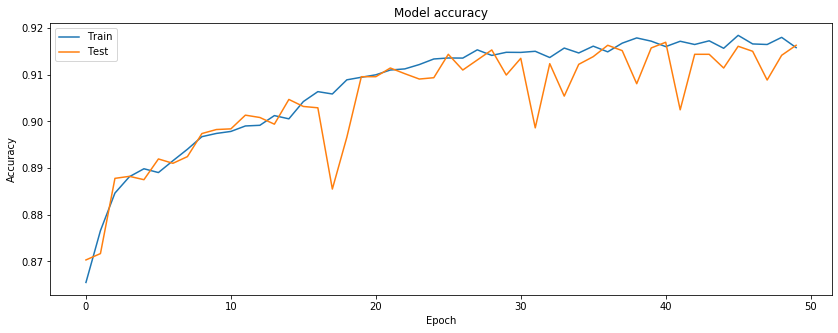

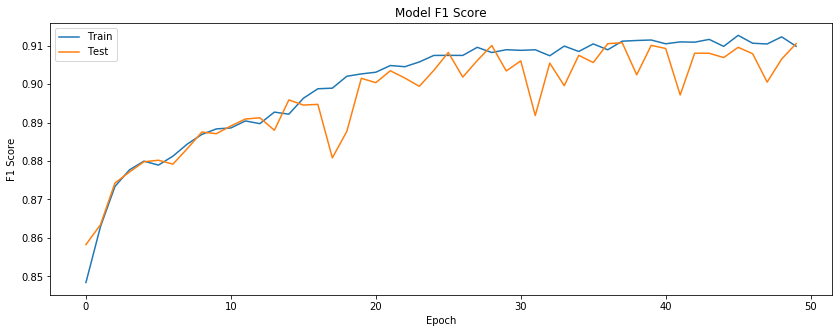

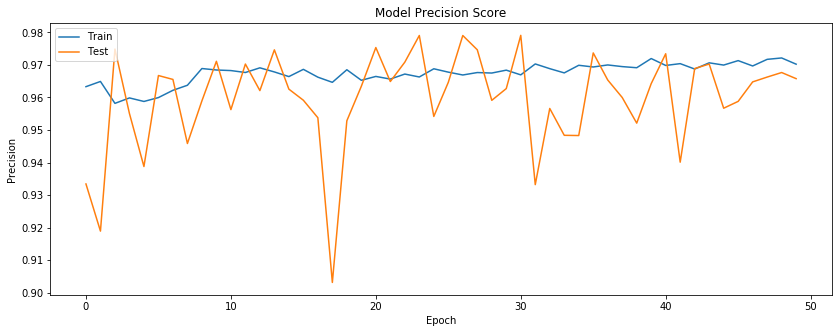

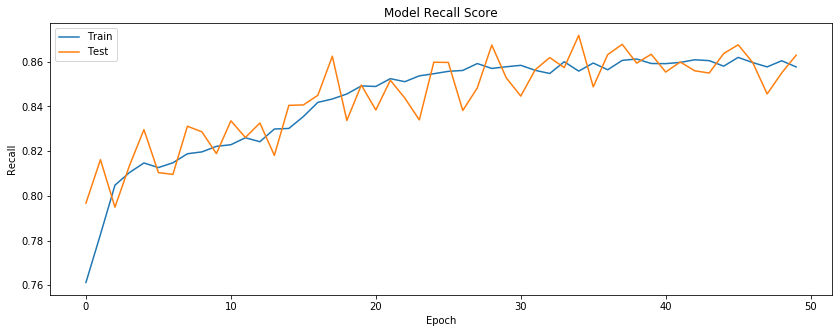

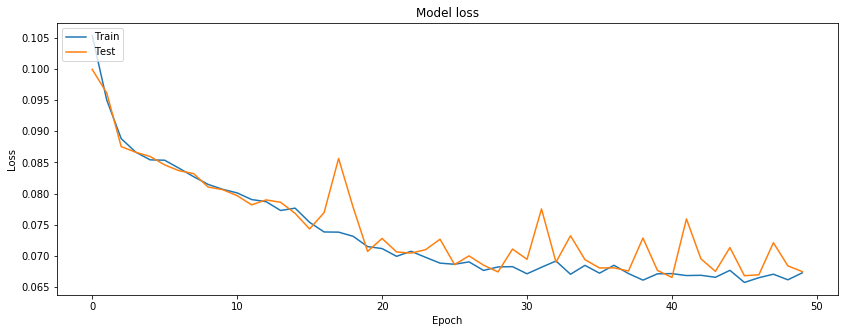

In [96]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation F1 score values
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation Precision values
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('Model Precision Score')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation Recall score values
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Model Recall Score')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [97]:
#for data withour FE, We need to create a new variable with concatination of the 2 dataset, drop unwanted columns and impute. Once that is done a new test and train split will be created and used furhter

In [98]:
df_F20 = pd.concat([df_A, df_B])

In [99]:

#dropping unwanted columns

df_F20.drop(['Temp','EtCO2','BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets','Unit1','Unit2'], axis=1, inplace=True)

In [100]:
df_F20

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,-0.03,1,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
1,97.0,95.0,98.0,75.33,NaN,19.0,83.14,0,-0.03,2,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
2,89.0,99.0,122.0,86.00,NaN,22.0,83.14,0,-0.03,3,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
3,90.0,95.0,NaN,NaN,NaN,30.0,83.14,0,-0.03,4,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
4,103.0,88.5,122.0,91.33,NaN,24.5,83.14,0,-0.03,5,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
5,110.0,91.0,NaN,NaN,NaN,22.0,83.14,0,-0.03,6,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
6,108.0,92.0,123.0,77.00,NaN,29.0,83.14,0,-0.03,7,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
7,106.0,90.5,93.0,76.33,NaN,29.0,83.14,0,-0.03,8,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
8,104.0,95.0,133.0,88.33,NaN,26.0,83.14,0,-0.03,9,0,D:/Masters Data/RIC/Sepsis/training_setA/train...
9,102.0,91.0,134.0,87.33,NaN,30.0,83.14,0,-0.03,10,0,D:/Masters Data/RIC/Sepsis/training_setA/train...


In [102]:
#checking for null values
df_F20.isnull().sum()

HR             153399
O2Sat          202736
SBP            226265
MAP            193270
DBP            486554
Resp           238335
Age                 0
Gender              0
HospAdmTime         8
ICULOS              0
SepsisLabel         0
filename            0
dtype: int64

In [103]:
#imputing using median

HR_median = df_F20['HR'].median()
df_F20['HR'].fillna(HR_median,inplace=True)

O2Sat_median = df_F20['O2Sat'].median()
df_F20['O2Sat'].fillna(O2Sat_median,inplace=True)


SBP_median = df_F20['SBP'].median()
df_F20['SBP'].fillna(SBP_median,inplace=True)


MAP_median = df_F20['MAP'].median()
df_F20['MAP'].fillna(MAP_median,inplace=True)


DBP_median = df_F20['DBP'].median()
df_F20['DBP'].fillna(DBP_median,inplace=True)


Resp_median = df_F20['Resp'].median()
df_F20['Resp'].fillna(Resp_median,inplace=True)

HospAdmTime_median = df_F20['HospAdmTime'].median()
df_F20['HospAdmTime'].fillna(HospAdmTime_median,inplace=True)

In [104]:
df_F20.isnull().sum()

HR             0
O2Sat          0
SBP            0
MAP            0
DBP            0
Resp           0
Age            0
Gender         0
HospAdmTime    0
ICULOS         0
SepsisLabel    0
filename       0
dtype: int64

In [105]:
#No null values

<h3> Data Splitting and under sampling <h3>

In [106]:
#Create independent and Dependent Features
columns = df_F20.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["SepsisLabel"]]
# Store the variable we are predicting 
target = "SepsisLabel"

In [107]:
# Define a random state 
state = np.random.RandomState(42)
X = df_F20[columns]
Y = df_F20[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [108]:
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1552210, 11)
(1552210,)


In [109]:
X.drop(["filename"], axis=1, inplace=True)

C:\Users\Tero\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [110]:
print(X.shape)
print(Y.shape)

(1552210, 10)
(1552210,)


In [111]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)

C:\Users\Tero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [112]:
X_res.shape,y_res.shape

((55832, 10), (55832,))

In [113]:

x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=10)

In [114]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [115]:


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [116]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,10), return_sequences = True))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 256)            273408    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 831,745
Trainable params: 831,745
Non-trainable params: 0
_________________________________________________________________


In [117]:
history = model.fit(X_train,y_train, epochs=45, batch_size=150, verbose=1, validation_data=(X_test,y_test), shuffle=True)

Train on 41874 samples, validate on 13958 samples
Epoch 1/45
41874/41874 [==============================] - 7s 158us/step - loss: 0.0529 - accuracy: 0.9348 - f1_m: 0.9284 - precision_m: 0.9716 - recall_m: 0.8957 - val_loss: 0.0356 - val_accuracy: 0.9559 - val_f1_m: 0.9536 - val_precision_m: 0.9940 - val_recall_m: 0.9170
Epoch 2/45
41874/41874 [==============================] - 6s 136us/step - loss: 0.0347 - accuracy: 0.9600 - f1_m: 0.9584 - precision_m: 0.9855 - recall_m: 0.9340 - val_loss: 0.0240 - val_accuracy: 0.9761 - val_f1_m: 0.9752 - val_precision_m: 0.9911 - val_recall_m: 0.9602
Epoch 3/45
41874/41874 [==============================] - 6s 140us/step - loss: 0.0387 - accuracy: 0.9559 - f1_m: 0.9537 - precision_m: 0.9847 - recall_m: 0.9265 - val_loss: 0.0392 - val_accuracy: 0.9528 - val_f1_m: 0.9503 - val_precision_m: 0.9931 - val_recall_m: 0.9118
Epoch 4/45
41874/41874 [==============================] - 6s 135us/step - loss: 0.0481 - accuracy: 0.9445 - f1_m: 0.9412 - precision_m

Epoch 31/45
41874/41874 [==============================] - 6s 136us/step - loss: 0.0424 - accuracy: 0.9532 - f1_m: 0.9495 - precision_m: 0.9835 - recall_m: 0.9217 - val_loss: 0.0277 - val_accuracy: 0.9685 - val_f1_m: 0.9673 - val_precision_m: 0.9913 - val_recall_m: 0.9448
Epoch 32/45
41874/41874 [==============================] - 6s 134us/step - loss: 0.0309 - accuracy: 0.9657 - f1_m: 0.9642 - precision_m: 0.9853 - recall_m: 0.9449 - val_loss: 0.0492 - val_accuracy: 0.9588 - val_f1_m: 0.9601 - val_precision_m: 0.9476 - val_recall_m: 0.9734
Epoch 33/45
41874/41874 [==============================] - 6s 136us/step - loss: 0.0422 - accuracy: 0.9530 - f1_m: 0.9503 - precision_m: 0.9831 - recall_m: 0.9230 - val_loss: 0.0222 - val_accuracy: 0.9747 - val_f1_m: 0.9738 - val_precision_m: 0.9904 - val_recall_m: 0.9583
Epoch 34/45
41874/41874 [==============================] - 6s 135us/step - loss: 0.0255 - accuracy: 0.9713 - f1_m: 0.9704 - precision_m: 0.9866 - recall_m: 0.9552 - val_loss: 0.0223

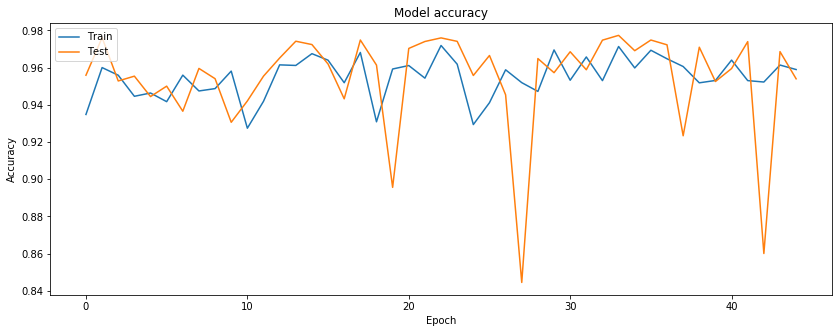

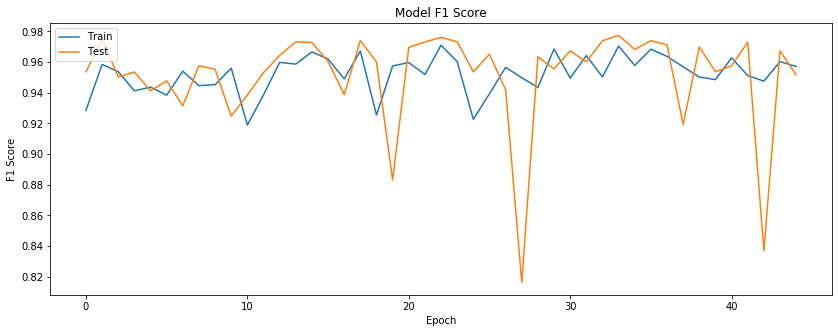

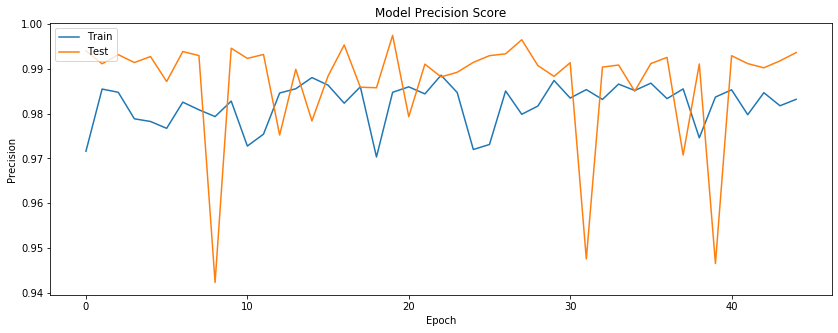

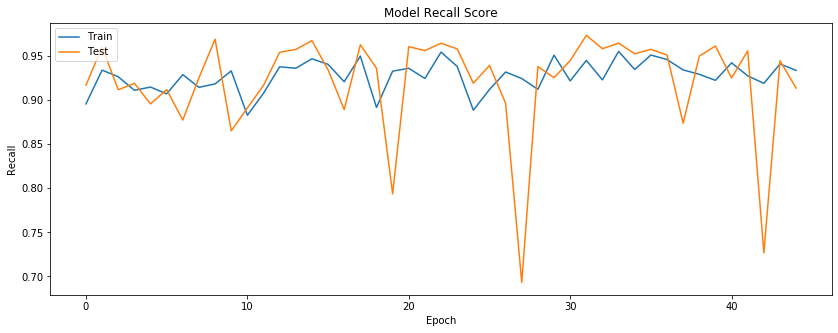

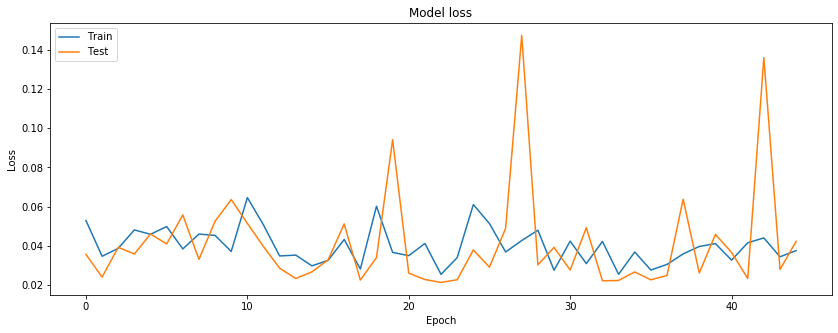

In [118]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation F1 score values
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation Precision values
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('Model Precision Score')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation Recall score values
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Model Recall Score')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<h5> varaible importance
    <h5

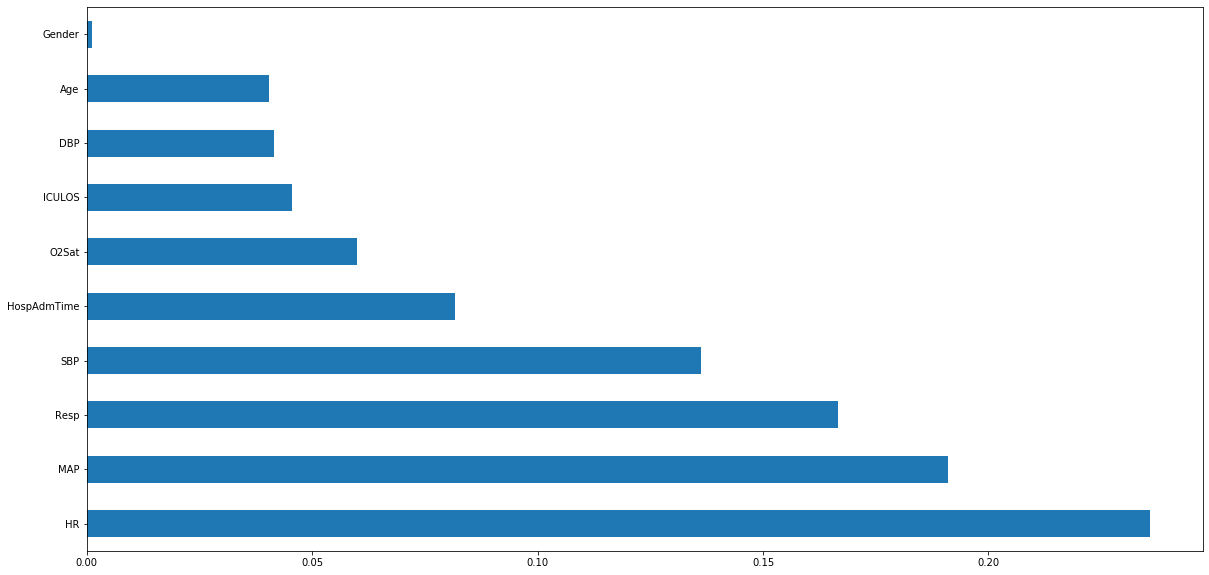

In [119]:

plt.figure(figsize=(20,10))

model = RandomForestClassifier(random_state=1211)
model.fit(x_train,y_train)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(37).plot(kind='barh')
plt.show()

<h4> Random Forest Classifier
    <h4>

In [120]:

best = RandomForestClassifier(random_state=1211, oob_score=True, max_depth=15, n_estimators=100, class_weight='balanced_subsample')
best.fit(x_train,y_train)

y_pred_best = best.predict(x_test)
y_pred_proba_best = best.predict_proba(x_test)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, y_pred_proba_best)
auc_best = auc(recall_best, precision_best)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
auroc = auc(fpr, tpr)

print(classification_report(y_test, y_pred_best))
print('F1 score:', f1_score(y_test,y_pred_best))
print('Precision:', precision_score(y_test,y_pred_best))
print('Recall:', recall_score(y_test,y_pred_best))
#print('AUPRC:', auc_best)
#print('AUC:', auroc)
print('Accuracy:', accuracy_score(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6930
           1       1.00      0.97      0.98      7028

    accuracy                           0.98     13958
   macro avg       0.98      0.98      0.98     13958
weighted avg       0.98      0.98      0.98     13958

F1 score: 0.9814319774582762
Precision: 0.9969176574196389
Recall: 0.9664200341491178
Accuracy: 0.9815876200028657


In [121]:

def report_performance(model):

    model_test = model.predict(x_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [122]:

def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [123]:
total_models = ['DecisionTreeClassifier','XGBClassifier','AdaBoostClassifier','KNeighborsClassifier']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(x_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu
    
    
total_f1 = {}
for i in total_models:
    total_f1[str(i)] = 0
def f1(model):
    pred = model.predict(x_test)
    f2 = metrics.f1_score(y_test,pred)
    print("\nF1 score Of the Model: ",f2,"\n\n")
    total_f1[str((str(model).split('(')[0]))] = f2
    
total_precision = {}
for i in total_models:
    total_precision[str(i)] = 0
def precision(model):
    pred = model.predict(x_test)
    pre = metrics.precision_score(y_test,pred)
    print("\nPrecision  Of the Model: ",pre,"\n\n")
    total_precision[str((str(model).split('(')[0]))] = pre
    
    
    

total_recall = {}
for i in total_models:
    total_recall[str(i)] = 0
def recall(model):
    pred = model.predict(x_test)
    rec = metrics.recall_score(y_test,pred)
    print("\nRecall  Of the Model: ",rec,"\n\n")
    total_recall[str((str(model).split('(')[0]))] = rec



Confusion Matrix:
[[6868   62]
 [ 290 6738]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6930
           1       0.99      0.96      0.97      7028

    accuracy                           0.97     13958
   macro avg       0.98      0.97      0.97     13958
weighted avg       0.98      0.97      0.97     13958



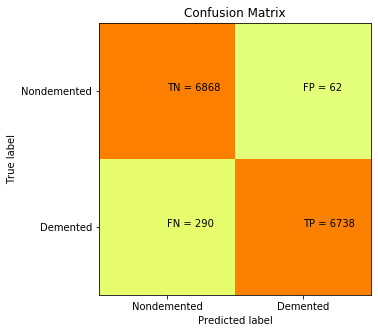


Acuuracy Of the Model:  0.9747814873191002 



F1 score Of the Model:  0.974544402661267 



Precision  Of the Model:  0.9908823529411764 



Recall  Of the Model:  0.9587364826408651 




In [125]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(x_train, y_train.ravel())
report_performance(clf_dtc) 
#roc_curves(clf_dtc)
accuracy(clf_dtc)
f1(clf_dtc)
precision(clf_dtc)
recall(clf_dtc)



Confusion Matrix:
[[6903   27]
 [ 213 6815]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6930
           1       1.00      0.97      0.98      7028

    accuracy                           0.98     13958
   macro avg       0.98      0.98      0.98     13958
weighted avg       0.98      0.98      0.98     13958



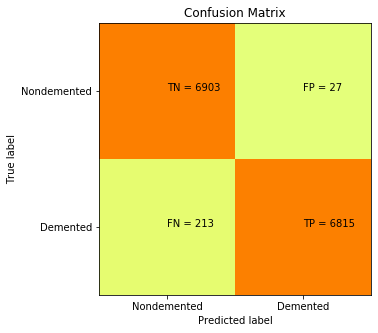


Acuuracy Of the Model:  0.9828055595357501 



F1 score Of the Model:  0.9826964671953857 



Precision  Of the Model:  0.996053785442853 



Recall  Of the Model:  0.9696926579396699 




In [126]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(x_train, y_train.ravel())
report_performance(clf_xgb) 
#roc_curves(clf_xgb)
accuracy(clf_xgb)
f1(clf_xgb)
precision(clf_xgb)
recall(clf_xgb)

In [127]:
clfs =[KNeighborsClassifier()]

KNeighborsClassifier : 


Confusion Matrix:
[[6888   42]
 [ 339 6689]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6930
           1       0.99      0.95      0.97      7028

    accuracy                           0.97     13958
   macro avg       0.97      0.97      0.97     13958
weighted avg       0.97      0.97      0.97     13958



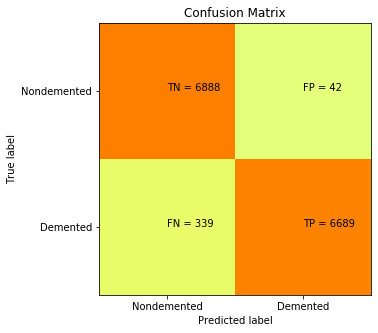


Acuuracy Of the Model:  0.9727038257630033 



F1 score Of the Model:  0.9723090340867795 



Precision  Of the Model:  0.9937602139355222 



Recall  Of the Model:  0.9517643710870802 




In [128]:
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(x_train,y_train.ravel())
    X = pd.DataFrame(x_train)
    report_performance(model)
    #roc_curves(model)
    accuracy(model)
    f1(model)
    precision(model)
    recall(model)

In [131]:
clfs =[AdaBoostClassifier()]

AdaBoostClassifier : 


Confusion Matrix:
[[6876   54]
 [ 265 6763]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6930
           1       0.99      0.96      0.98      7028

    accuracy                           0.98     13958
   macro avg       0.98      0.98      0.98     13958
weighted avg       0.98      0.98      0.98     13958



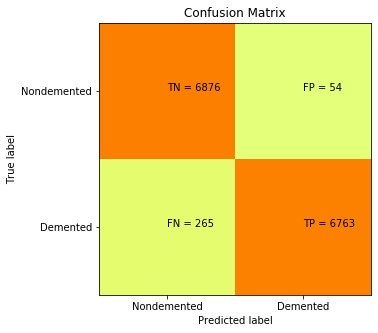


Acuuracy Of the Model:  0.9771457228829346 



F1 score Of the Model:  0.9769591910436981 



Precision  Of the Model:  0.9920786269620068 



Recall  Of the Model:  0.9622936824132043 




In [132]:
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(x_train,y_train.ravel())
    X = pd.DataFrame(x_train)
    report_performance(model)
    #roc_curves(model)
    accuracy(model)
    f1(model)
    precision(model)
    recall(model)